# Buckley Leverett deck

Comment:  
The fluid properties are at reservoir conditions. For the recovery factor this is not an issue. However, for the water cut one needs to be a bit more careful.
One has the following relation between the fractional water flow at reservoir and surface conditions:
$$
\begin{align}
f_w &= \dfrac{q_w}{q_w+q_o} \\
f_{ws} &= \dfrac{q_w/B_w}{q_w/B_w + q_o/B_o} \\
f_{ws} & = \dfrac{1}{1+\frac{B_w}{B_o}\left(\frac{1}{f_w}-1\right)}
\end{align}
$$
This correction is not in the code!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import buckley_leverett_util as blu

# Input parameters

## Parametrization

The following parametrization ias used for the relperm parameters: 
$$
\begin{align}
k_{rw}(S_w) & = k^e_{rw} S^{n_w} \\
k_{ro}(S_w) & = k^e_{ro} (1-S)^{n_o}
\end{align}
$$

where
$$
S = \frac{(S_w-S_{cw})}{(1-S_{cw}-S_{orw})}
$$
## Conditions on the parameters
For the relative permeabilities we require:
$$
k^e_{rw}, k^e_{ro} > 0 \\
n_w, n_o \geq 1 \\
0 < S_{cw} < 1-S_{orw}< 1 \\
$$
The solution in this code has only been tested for Corey exponents in the above range, not investigated what happens for smaller exponents.

## Some more dimensionless numbers

Endpoint mobility ratio:
$$M = \frac{k^e_{rw}}{\mu_w} / \frac{\mu_o}{k^e_{ro}}$$

Dimensionless gravity number:
$$
N_G = \dfrac{k k^e_{ro} A}{q \mu_o} \Delta \rho \sin\alpha

$$
Note that we have absorbed the term $\sin\alpha$ in $N_G$. In the literature this is not always done.

With the above the fractional flow has the following form:
$$f_w(S_w) = \frac{MS^{nw}}{(1-S)^{no}+MS^{nw}} \Big( 1-N_{G}(1-S)^{no})\Big)$$
again with
$$
S = \frac{(S_w-S_{cw})}{(1-S_{cw}-S_{orw})}
$$

In [2]:
# The viscosities are input in cP.
params = { 'krwe': 1.0, 'nw': 2., 'Scw': 0.1,
           'kroe': 1.0, 'no': 3, 'Sorw': 0.1,
           'muo': 10, 'muw': 1.0}

# The absolute permeability is input in mD.
# The water and oil densities, rhow and rhoo, are input in kg/m^3.
# The total flow rate, qtot, is input in m^3/day.
# The cross-sectional area, area, is input in m^2.
# The dip angle, dip, is input in degrees. It is measured wrt the horizontal plane
# and the positive direction is anti-clockwise
grav_params = {'kabs': 1000, 'kroe': params['kroe'], 'muo': params['muo'],
               'rhow': 1000, 'rhoo': 800, 'qtot': 10, 'area': 1000, 'dip':20}

# Calculate the dimensionless gravity number, NG
NG = blu.calc_NG(params_dict = grav_params)

# Gravity is included for GravOn=True, otherwise it is not included.
bl = blu.BuckleyLeverett(params_dict = params, GravOn=True, NG=NG)
if bl.GravOn:
    print(f'Dimensionless gravity number incl. dip effect = {NG:6.4e}')
    print(f'Dimensionless gravity number excl. dip effect = {NG/np.sin(grav_params['dip']*np.pi/180):4.2e}')

Dimensionless gravity number incl. dip effect = 5.7219e-01
Dimensionless gravity number excl. dip effect = 1.67e+00


Swi = 0.2000
Sw1 = 0.3090
Mobility ratio             = 1.00e+01
Shock front mobility ratio = 1.31e+00
rarefaction speed, front = shock speed = 3.37e+00
Breakthrough after 2.97e-01 PV injected


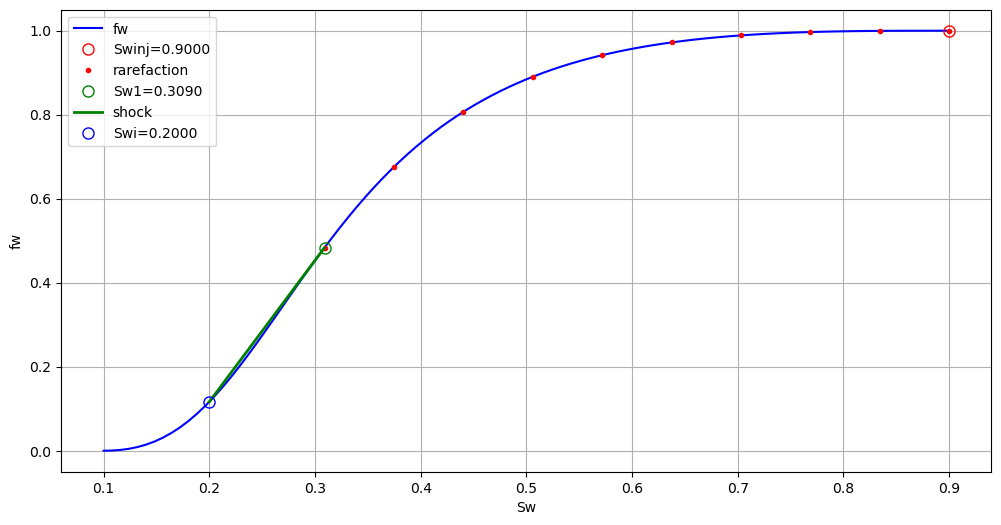

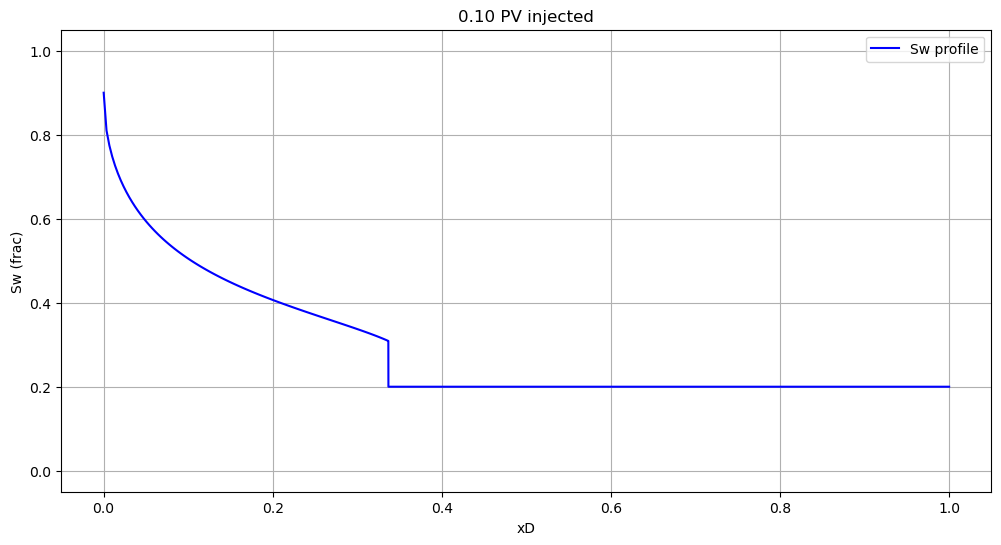

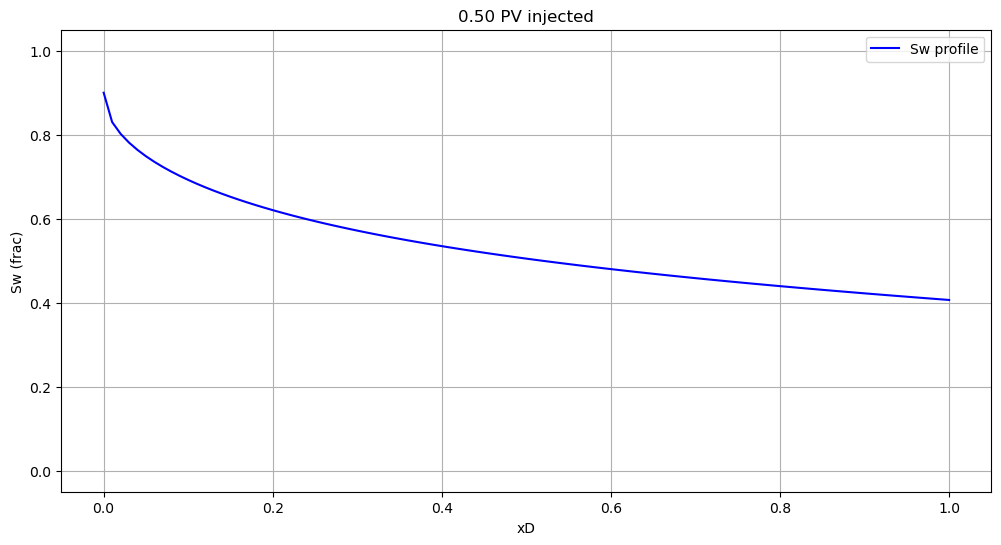

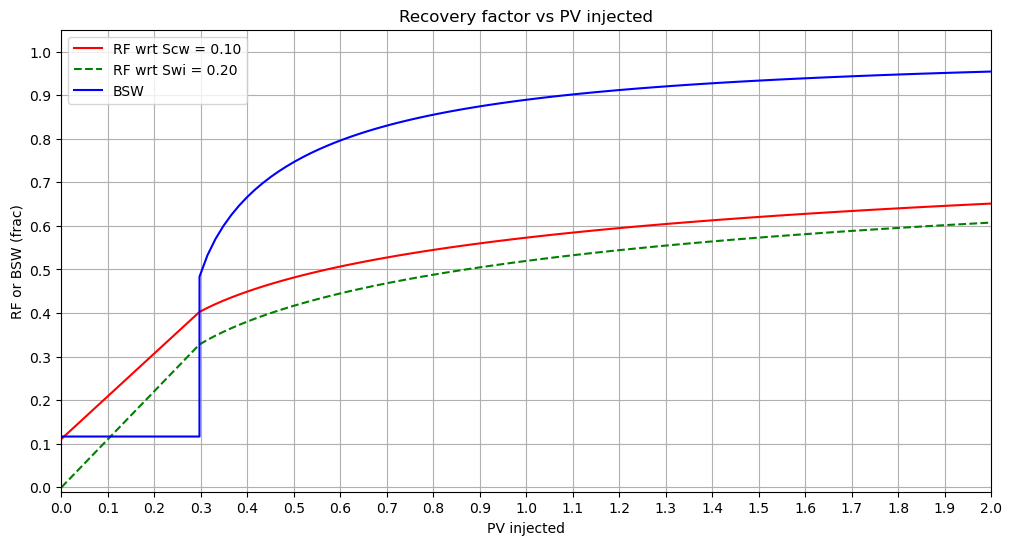

In [3]:
# For Swi=Scw it is not really required to set Swi, as this is the default
Swi = bl.set_Swi(bl.Scw)
Swi = bl.set_Swi(0.2) 
print(f'Swi ={Swi: 6.4f}')

fig, ax = bl.plot_solution()

data, fig_prf, ax_prf = bl.plot_profile([0.1,0.5], sizex=12, sizey=6) 

RF_Scw, RF_Swi, BSW, fig_RF, ax_RF = bl.plot_RF(ns=101)
fig_RF.set_figheight(6)
fig_RF.set_figwidth(12)
ax_RF.set_xlim(0,2)
ax_RF.set_xticks(np.arange(0,2.05,0.1)); # This semicolon suppresses output from this command
